# BME 590 Data Science and Health
## Midterm Project

For the midterm project, you will be putting all of the skills that we have covered in the course so far to create a clinical risk prediction score. Please follow the instructions in this notebook carefully to make sure that you receive full credit for this assignment.

### Background

In 1987, a paper was published in the *Journal of Chronic Disease* titled *A New Method of Classifying Prognostic Comorbidity in Longitudinal Studies: Development and Validation*. This was one of the first papers that created a clinical risk score that could be easily computed and could predict clinical outcomes. To give you an idea of how popular this score is, it has been cited 27,497 times at the time that this assignment was created. As a note, comorbidity describes how many different diseases a patient has. 

In 1987, statistical methods were not as easy to apply as they are today. In addition, data were much harder to come by and to analyze. Due to the improvement of computing power and general statistical practice, it is now much easier to create clinical risk scores than in the past. This will your primary task in this assignment.

## Task 1: 

Before you begin creating your own version of the Charlson Comorbidity Index, as it is known, it is important to familiarize yourself with the paper. A copy of it can be found [here](http://www.aqc.ch/download/HSM_Suppl_8_charlson.pdf). 

### Answer the following questions:

#### How many patients' data were used to create the model?

559 patients

All patients admitted to New York Hospital-Cornell Medical Center during 1 month in 1984 were eligible (607 patients). The charts from 3 patients were lost, making it 604 eligible patients. Of those 604 patients, only 559 had available 1-year follow-up information.

#### What time frame were the data from?

A 1 month period in 1984

#### Where was the model validated?

In a testing population of women with breast cancer; their 5- and 10-year follow ups were collected
The comorbidity index developed here was used to try to predict survival and was compared to an alternative index

#### How many patients were used to validate the model results?

685 women

#### What were the characteristics of patients in the "Testing population"?

Women with histologically proven primary carcinoma (breast cancer)
Received first treatment at Yale New Haven Hospital between 1/1/62 and 12/31/69

___

In the original paper, the conditions listed are not coded in any way. Follow-up papers by [Deyo in 1992](https://www.ncbi.nlm.nih.gov/pubmed/1607900) and [Quan in 2005](https://www.ncbi.nlm.nih.gov/pubmed/16224307), added the ICD-9-CM groupings for the conditions listed in the Charlson Comorbidity Index. In the provided database, a lookup between condition category and code has been provided.

## Task 2: Exploratory Data Analysis and SQL

For this project, the data is located [here](https://duke.box.com/s/vx627f0cypndusbl2k6jyqp9vo33d15g). Please download the database and put it in the same directory as this notebook (or in its own separate directory if you choose). **Make sure you add the database to the provided .gitignore file**. 

### DO NOT COMMIT THE DB FILE

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("./mimic_subset.db")

##### Create a connection to the database and complete the following tasks/answer the questions using SQL queries. Remember that you can make a SQL query to the database with the following syntax:

`pd.read_sql(""" YOUR SQL QUERY """, conn)`

### General

#### List the tables

#### For each table, pull a few rows and list the columns

### Patients:

#### What is the breakdown of gender for patients?

In [84]:
females = pd.read_sql(
"""
SELECT COUNT(GENDER)
FROM patient
WHERE GENDER = 'F'
""", conn).values[0][0]

males = pd.read_sql(
"""
SELECT COUNT(GENDER)
FROM patient
WHERE GENDER = 'M'
""", conn).values[0][0]

num_patients = females + males
print(females, "female patients make up", females/num_patients*100, "% of the population")
print(males, "male patients make up", males/num_patients*100, "% of the population")

20399 female patients make up 43.8499570077386 % of the population
26121 male patients make up 56.1500429922614 % of the population


#### Of the patients in the patients table, how many of them have a death date listed? 

In [86]:
withdeath = pd.read_sql(
"""
SELECT COUNT(*)
FROM patient ROW_ID
WHERE DOD IS NOT NULL
""", conn).values[0][0]

print(withdeath, "patients -", withdeath/num_patients, "% ","- with a death date")

15759 patients - 0.33875752364574374 %  - with a death date


### Admissions:

#### How many unique patients are there in the admissions dataset?

In [94]:
unique = pd.read_sql(
"""
SELECT COUNT(DISTINCT SUBJECT_ID)
FROM admission
""", conn).values[0][0]
print(unique, "unique patients")

17680 unique patients


#### How many unique encounters are there in this dataset?

In [95]:
unique_hadm = pd.read_sql(
"""
SELECT COUNT(DISTINCT HADM_ID)
FROM admission
""", conn).values[0][0]
print(unique_hadm, "unique encounters")

21879 unique encounters


#### How many encounters have an ED time (either registration or out) listed?

In [96]:
hadm_with_ed = pd.read_sql(
"""
SELECT COUNT(HADM_ID)
FROM admission
WHERE (EDREGTIME IS NOT NULL OR EDOUTTIME IS NOT NULL)
""", conn).values[0][0]
print(hadm_with_ed, "unique encounters that have ED time")

14495 unique encounters that have ED time


#### List the primary diagnoses (Diagnosis field) in order of their prevalence

In [106]:
pd.read_sql("""
SELECT diagnosis, COUNT(diagnosis)
FROM admission
GROUP BY diagnosis
ORDER BY COUNT(diagnosis) DESC
LIMIT 10
""", conn)

,DIAGNOSIS,COUNT(diagnosis)
0,PNEUMONIA,969
1,SEPSIS,501
2,ALTERED MENTAL STATUS,477
3,INTRACRANIAL HEMORRHAGE,441
4,CONGESTIVE HEART FAILURE,418
5,UPPER GI BLEED,385
6,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,378
7,CHEST PAIN,353
8,ABDOMINAL PAIN,313
9,CORONARY ARTERY DISEASE,302


#### Now list the count of diagnoses along with the diagnosis name only for patients who died in their hospital stay in descending order

In [104]:
pd.read_sql(
"""
SELECT COUNT(DIAGNOSIS), DIAGNOSIS
FROM admission
WHERE HOSPITAL_EXPIRE_FLAG == 1
GROUP BY DIAGNOSIS
ORDER BY COUNT(DIAGNOSIS) DESC
LIMIT 10
""", conn)

,COUNT(DIAGNOSIS),DIAGNOSIS
0,150,PNEUMONIA
1,138,INTRACRANIAL HEMORRHAGE
2,100,SEPSIS
3,54,ALTERED MENTAL STATUS
4,49,CONGESTIVE HEART FAILURE
5,44,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK
6,39,CARDIAC ARREST
7,38,ABDOMINAL PAIN
8,32,HYPOTENSION
9,32,S/P FALL


In [105]:
pd.read_sql("""
SELECT COUNT(diagnosis),diagnosis
FROM admission
WHERE deathtime IS NOT NULL
GROUP BY diagnosis
ORDER BY COUNT(diagnosis) DESC
LIMIT 10
""", conn)

,COUNT(diagnosis),DIAGNOSIS
0,150,PNEUMONIA
1,138,INTRACRANIAL HEMORRHAGE
2,100,SEPSIS
3,54,ALTERED MENTAL STATUS
4,49,CONGESTIVE HEART FAILURE
5,44,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK
6,39,CARDIAC ARREST
7,38,ABDOMINAL PAIN
8,32,HYPOTENSION
9,32,S/P FALL


### Charlson Codes:

#### How many categories are there? 

In [109]:
num_categories = pd.read_sql(
"""
SELECT COUNT(DISTINCT category)
FROM charlson_codes
""", conn).values[0][0]
print(num_categories, "categories")

17 categories


### Diagnoses

#### What is the minimum, average, and maximum count of codes that is given to a patient at a particular encounter?

In [124]:
pd.read_sql(
"""
SELECT MIN(count_codes), AVG(count_codes), MAX(count_codes)
FROM (
    SELECT HADM_ID, COUNT(HADM_ID) AS "count_codes"
    FROM diagnosis
    GROUP BY HADM_ID
)
""", conn)

,MIN(count_codes),AVG(count_codes),MAX(count_codes)
0,1,14.632936,39


### Combined information

#### There is a `DEATHTIME` column in the admission table. In addition, there is death information present in the patient table. Is the information in the admission table complete? (Are there patients who have death information in the patient table who do not have the same information in the admissions table?)

In [125]:
pd.read_sql(
"""
SELECT admission.SUBJECT_ID, admission.DEATHTIME, patient.DOD
FROM admission
    INNER JOIN
patient ON
    (admission.SUBJECT_ID = patient.SUBJECT_ID)
    AND
    (admission.DEATHTIME != patient.DOD)
LIMIT 10
""", conn)

,SUBJECT_ID,DEATHTIME,DOD
0,124,2166-02-01 06:55:00,2166-02-01 00:00:00
1,109,2142-08-30 15:20:00,2142-08-30 00:00:00
2,111,2144-07-01 14:55:00,2144-07-01 00:00:00
3,305,2129-09-07 17:55:00,2129-09-07 00:00:00
4,502,2143-11-04 17:28:00,2143-11-04 00:00:00
5,188,2162-01-17 05:50:00,2162-01-17 00:00:00
6,975,2142-06-21 14:38:00,2142-06-21 00:00:00
7,747,2147-03-07 21:02:00,2147-03-07 00:00:00
8,1197,2197-11-24 12:00:00,2197-11-24 00:00:00
9,1401,2185-09-17 12:00:00,2185-09-17 00:00:00


#### Join the diagnosis and the Charlson tables together by code and list the Charlson Categories and their counts in descending order

In [126]:
pd.read_sql(
"""
SELECT count(charlson_codes.category), charlson_codes.category
FROM diagnosis
    INNER JOIN
charlson_codes ON 
    (diagnosis.ICD9_CODE = charlson_codes.code)
GROUP BY charlson_codes.category
ORDER BY count(charlson_codes.category) DESC
""", conn)

,count(charlson_codes.category),category
0,11347,CHF
1,6402,Pulmonary
2,6209,Renal
3,5295,DM
4,4041,Stroke
5,3457,MI
6,3407,LiverMild
7,2918,PVD
8,2902,Mets
9,2901,Cancer


## Task 3: Visualize

For this task, you can use pandas along with any plotting library that we've learned about to create the following visualizations. You may have to create a separate dataframe specifically for each of these plots.

> One important concept in hospital care is the Length of Stay for a patient. In general, the longer a patient stays, the more severe their case. There are many initiatives to try and reduce the length of stay. 

#### Create a length of stay (in days) column in the dataframe. The Length of Stay is defined as the discharge time minus the admission time. 

For this, you will need to use the `.dt.days` accessor as seen [here](https://stackoverflow.com/a/45039811)

In [2]:
df = pd.read_sql_query("SELECT ADMISSION_TYPE, ADMITTIME, DISCHTIME FROM admission;", conn)

In [6]:
df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'])
df['DISCHTIME'] = pd.to_datetime(df['DISCHTIME'])
df['STAY_LENGTH'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.days
df.head()

,ADMISSION_TYPE,ADMITTIME,DISCHTIME,STAY_LENGTH
0,EMERGENCY,2157-10-18 19:34:00,2157-10-25 14:00:00,6
1,EMERGENCY,2191-02-23 05:23:00,2191-02-25 20:20:00,2
2,ELECTIVE,2134-05-10 11:30:00,2134-05-20 13:16:00,10
3,EMERGENCY,2199-10-20 12:05:00,2199-10-23 17:30:00,3
4,EMERGENCY,2199-12-21 22:37:00,2200-01-18 11:45:00,27


#### Create a plot which contains boxplots that contain the length of stay information, broken down by Admission Type

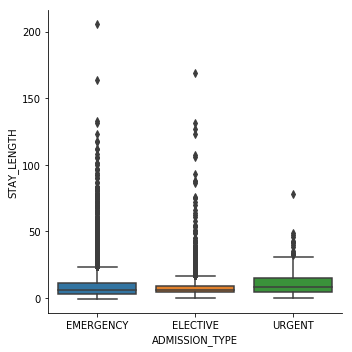

In [20]:
import seaborn as sns
import numpy as np
%matplotlib inline
sns.catplot(
    data=df,
    x="ADMISSION_TYPE",
    y="STAY_LENGTH",
    kind="box"
)

#### Create a scatter plot which has the length of stay in days on one axis and the number of diagnosis codes for a particular encounter on the other

In [10]:
df = pd.read_sql_query(
"""
SELECT
    admission.HADM_ID,
    admission.ADMISSION_TYPE, 
    admission.ADMITTIME,
    admission.DISCHTIME,
    COUNT(diagnosis.ICD9_CODE) AS ICD9_COUNT
FROM 
    admission
        INNER JOIN
    diagnosis ON
        (admission.HADM_ID = diagnosis.HADM_ID)
GROUP BY admission.HADM_ID
"""
,conn)

df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'])
df['DISCHTIME'] = pd.to_datetime(df['DISCHTIME'])
df['STAY_LENGTH'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.days
df.head()

,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,ICD9_COUNT,STAY_LENGTH
0,100001,EMERGENCY,2117-09-11 11:46:00,2117-09-17 16:45:00,16,6
1,100003,EMERGENCY,2150-04-17 15:34:00,2150-04-21 17:30:00,9,4
2,100009,EMERGENCY,2162-05-16 15:56:00,2162-05-21 13:37:00,18,4
3,100010,ELECTIVE,2109-12-10 07:15:00,2109-12-14 16:45:00,5,4
4,100011,EMERGENCY,2177-08-29 04:51:00,2177-09-12 14:24:00,14,14


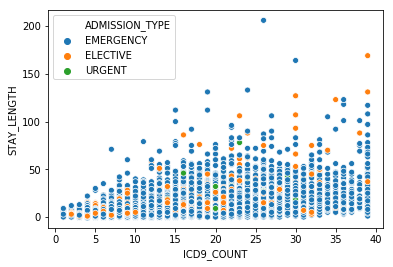

In [11]:
sns.scatterplot(
    data=df,
    y="STAY_LENGTH", 
    x="ICD9_COUNT",
    hue='ADMISSION_TYPE'
)

#### Ask your own question about the data and answer it with a visualization

## Task 4: Create the Design/Model matrix 

For this task, you will create the Design/Model matrix for your clinical risk score. Each row should pertain to a unique encounter, and the columns should be each of the categories available in the `charlson_codes` table. 

In particular, you will need to detect the presence of an ICD-code that belongs to a category in the Charlson Comorbidity Index, and make the corresponding entry a 1 if it is present, and a 0 if it is not. 

In addition, you should create a column that contains the value 1.0 repeated to represent the intercept weight. 

Finally, you will need 1 column that represents whether a patient's death date is within 1 year of their encounter `ADMITTIME`.

Below are a list of steps that can walk you through the process. You do not need to necessarily follow these steps, but at the end you should end up with a matrix that looks something like this (with all of the category columns)


##### As a DataFrame

In [153]:
example_df = pd.DataFrame({'Intercept': [1,1,1], 'CHF': [1, 0, 0], 'MI': [1, 1, 0], 'Stroke': [0, 0, 0], '1_yr_mortality': [1, 0, 0]})
example_df

,Intercept,CHF,MI,Stroke,1_yr_mortality
0,1,1,1,0,1
1,1,0,1,0,0
2,1,0,0,0,0


##### As a Numpy array

In [154]:
example_df.values

array([[1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

### Creating the Design Matrix

For this task, you will need to use the `admission`, `diagnosis`, `charlson_codes`, and `patient` tables. 

To get an accurate death date at the encounter level, join the patient table into the admission table by patient identifier. From there, create a new column that determines whether there has been 1 year or less between the mortality(death) date and the admission time. 

Remember that when working with datetime columns, you will need to utilize the `pd.to_datetime` function. You can subtract times and use the `.dt.days` method to extract the number of days. [Reference](https://stackoverflow.com/a/45039811)

In [74]:
ap = pd.read_sql_query(
"""
SELECT
    admission.ADMITTIME,
    admission.DISCHTIME,
    admission.DEATHTIME,
    patient.SUBJECT_ID AS pid

FROM
    admission
        INNER JOIN
    patient ON patient.SUBJECT_ID = admission.SUBJECT_ID
    
GROUP BY admission.HADM_ID
"""
, conn)

ap['ADMITTIME'] = pd.to_datetime(ap['ADMITTIME'])
ap['DISCHTIME'] = pd.to_datetime(ap['DISCHTIME'])
ap['DEATHTIME'] = pd.to_datetime(ap['DEATHTIME'])
ap['one_year_mortality'] = ((ap['DEATHTIME'] - ap['ADMITTIME']).dt.days <= 365)*1
ap.head()

,ADMITTIME,DISCHTIME,DEATHTIME,pid,one_year_mortality
0,2117-09-11 11:46:00,2117-09-17 16:45:00,NaT,58526,0
1,2150-04-17 15:34:00,2150-04-21 17:30:00,NaT,54610,0
2,2162-05-16 15:56:00,2162-05-21 13:37:00,NaT,533,0
3,2109-12-10 07:15:00,2109-12-14 16:45:00,NaT,55853,0
4,2177-08-29 04:51:00,2177-09-12 14:24:00,NaT,87977,0


In [12]:
ap = pd.read_sql_query(
"""
SELECT
    admission.ADMITTIME,
    admission.DISCHTIME,
    admission.DEATHTIME,
    patient.SUBJECT_ID AS id
    
FROM 
    admission
        INNER JOIN
    diagnosis ON diagnosis.HADM_ID = admission.HADM_ID
        INNER JOIN
    patient ON patient.SUBJECT_ID = admission.SUBJECT_ID
    
GROUP BY admission.HADM_ID
"""
,conn)

ap['ADMITTIME'] = pd.to_datetime(ap['ADMITTIME'])
ap['DISCHTIME'] = pd.to_datetime(ap['DISCHTIME'])
ap['DEATHTIME'] = pd.to_datetime(ap['DEATHTIME'])
ap['1_yr_mortality'] = ((ap['DEATHTIME'] - ap['ADMITTIME']).dt.days < 365) * 1
ap.head()

,ADMITTIME,DISCHTIME,DEATHTIME,id,1_yr_mortality
0,2117-09-11 11:46:00,2117-09-17 16:45:00,NaT,58526,0
1,2150-04-17 15:34:00,2150-04-21 17:30:00,NaT,54610,0
2,2162-05-16 15:56:00,2162-05-21 13:37:00,NaT,533,0
3,2109-12-10 07:15:00,2109-12-14 16:45:00,NaT,55853,0
4,2177-08-29 04:51:00,2177-09-12 14:24:00,NaT,87977,0


Next, join the `diagnosis` and `charlson_codes` data together. If there is missing information, use the type of join that removes missing information. Not all diagnosis codes map to an existing Charlson category. 

In [58]:
dcc = pd.read_sql_query(
"""
SELECT *

FROM
    diagnosis
        INNER JOIN
    charlson_codes ON charlson_codes.code = diagnosis.ICD9_CODE
"""
, conn)
dcc.head()

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,index,code,category
0,0,0,1297,109,172335,1.0,40301,4762,40301,Renal
1,2,2,1299,109,172335,3.0,58281,4862,58281,Renal
2,3,3,1300,109,172335,4.0,5855,5004,5855,Renal
3,4,4,1301,109,172335,5.0,4254,232,4254,CHF
4,6,6,1303,109,172335,7.0,7100,3372,7100,Rheumatic


In [56]:
dcc = pd.read_sql_query(
"""
SELECT
    diagnosis.SUBJECT_ID as id,
    charlson_codes.category
FROM
    diagnosis
        INNER JOIN
    charlson_codes ON charlson_codes.code = diagnosis.ICD9_CODE
"""
, conn)
dcc.head()

,id,category
0,109,Renal
1,109,Renal
2,109,Renal
3,109,CHF
4,109,Rheumatic


Once you have this new DataFrame, you will notice that it is in a long format. You will need to turn it into a wide format so that each category is represented as its own column. You can start with this command to get started:

In [59]:
dcc = dcc.groupby(['SUBJECT_ID', 'category']).size().unstack().fillna(0).astype(int)
dcc.head()

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
SUBJECT_ID,,,,,,,,,,,,,,,,,
34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,2,0,0,0,0,0,0,0,1,0,1,0,0,0,5,0,0
109,14,0,0,0,0,0,0,0,0,0,7,8,0,1,79,25,0


In [17]:
dcc = dcc.pivot_table(index='id', columns='category', aggfunc=any, fill_value=0).astype(int)
dcc.head()

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
id,,,,,,,,,,,,,,,,,
34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
109,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0


`.groupby(['id', 'category']).size().unstack()`

You will also need to binarize (turn to 1s and 0s) each of the category columns. 

In [60]:
dcc = (dcc > 0).astype(int)
#dcc.reset_index(level=0, inplace=True)
dcc.head()

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
SUBJECT_ID,,,,,,,,,,,,,,,,,
34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
109,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0


In [67]:
ap[['SUBJECT_ID', 'one_year_mortality']]

,SUBJECT_ID,SUBJECT_ID,one_year_mortality
0,58526,58526,0
1,54610,54610,0
2,533,533,0
3,55853,55853,0
4,87977,87977,0
5,60039,60039,0
6,68591,68591,0
7,58128,58128,0
8,9973,9973,0
9,77221,77221,0


In [76]:
merge = ap[['pid', 'one_year_mortality']].set_index('pid').join(dcc, how='inner')
merge['intercept'] = 1
merge.head()

,one_year_mortality,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,intercept
34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
107,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
107,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1


In [18]:
merge = ap[['id','1_yr_mortality']].set_index('id').join(dcc, how='inner')
merge['w0'] = 1
merge.head()

,1_yr_mortality,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,w0
id,,,,,,,,,,,,,,,,,,,
34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
107,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
107,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1


Merge all of the data together so that it looks like the example above.

# Task 5:

Implement the gradient ascent algorithm and use it to iteratively update some initialized weights for your logistic regression.

Recall that the average loss can be expressed as follows:

$$\frac{1}{m}\sum_{i=1}^{m}y^{(i)} \log \sigma(\textbf{w}^T\textbf{x}^{(i)}) + (1-y^{(i)}) \log (1- \sigma(\textbf{w}^T\textbf{x}^{(i)}) $$

The Gradient Ascent update equation is given by: 
$$ w_j \leftarrow w_j + \alpha(y-\sigma(\textbf{w}^T\textbf{x}))x_j $$

where $\alpha$ is a learning rate which affects the speed of convergence. 

The pseudocode to fit a logistic regression model looks similar to the following:
```    
Repeat {

  1. Calculate average gradient value (for all x_j)
  2. Multiply by learning rate
  3. Update the weights by adding this value

}
```

In practice, you will want to initialize an array of weights w of the appropriate size with all 0s or some other small random value. Then, you will follow the pseudocode above, and update the weights iteratively. At each step, you will want to compute the value $y - \sigma(\textbf{w}^T\textbf{x})x_j$ over all of the rows of the matrix and find the average value over the entire dataset. Then apply the learning rate and update the weights according to the update equation above.

You will want to repeat this procedure until the algorithm converges. You can play around with the learning rate and the number of total iterations for this program to converge either faster or slower. In addition, you can choose to use other versions of gradient descent, such as mini-batch gradient descent and/or stochastic gradient descent to improve the convergence rate.

you can test your weights against the results of running logistic regression from the statsmodels implementation.

```
from statsmodels import api as sm

logit = sm.Logit(y, X)
logit.fit().params
```

In [ ]:
You can test to see how 

In [3]:
admissions = pd.read_sql("""SELECT * FROM admission""", conn)
diagnosis = pd.read_sql("""SELECT * FROM diagnosis""", conn)
charlson = pd.read_sql("""SELECT * FROM charlson_codes""", conn)
patient = pd.read_sql("""SELECT * FROM patient""", conn)

In [8]:
admissions.head()

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,VENTRAL HERNIA/SDA,0,1
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-12-21 20:38:00,2199-12-22 00:01:00,ALTERED MENTAL STATUS,0,1


In [9]:
diagnosis.head()

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,0,0,1297,109,172335,1.0,40301
1,1,1,1298,109,172335,2.0,486
2,2,2,1299,109,172335,3.0,58281
3,3,3,1300,109,172335,4.0,5855
4,4,4,1301,109,172335,5.0,4254


In [10]:
charlson.head()

,index,code,category
0,0,410,MI
1,1,4100,MI
2,2,41000,MI
3,3,41001,MI
4,4,41002,MI


In [11]:
patient.head()

,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,2,236,251,M,2090-03-15 00:00:00,None,None,None,0
3,3,237,252,M,2078-03-06 00:00:00,None,None,None,0
4,4,238,253,F,2089-11-26 00:00:00,None,None,None,0


# 1 year mortality

In [12]:
patient_death = patient[['SUBJECT_ID', 'DOD']]

In [13]:
admissions = pd.merge(admissions, patient_death, how = 'inner', left_on = ['SUBJECT_ID'], right_on = ['SUBJECT_ID'])

In [14]:
admissions

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,DOD
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1,None
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1,2192-01-30 00:00:00
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,VENTRAL HERNIA/SDA,0,1,None
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,2201-08-02 00:00:00
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-12-21 20:38:00,2199-12-22 00:01:00,ALTERED MENTAL STATUS,0,1,2201-08-02 00:00:00
5,5,90,88,85,112077,2167-07-25 18:49:00,2167-07-30 15:24:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,MARRIED,WHITE,2167-07-25 16:37:00,2167-07-25 20:46:00,PNEUMONIA,0,1,2167-09-12 00:00:00
6,6,115,113,107,182383,2121-11-30 19:24:00,2121-12-05 14:18:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,SEPARATED,HISPANIC OR LATINO,2121-11-30 16:40:00,2121-11-30 19:57:00,HYPERKALEMIA;CONGESTIVE HEART FAILURE,0,1,None
7,7,116,114,107,174162,2122-05-14 19:37:00,2122-05-18 15:11:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,SEPARATED,HISPANIC OR LATINO,2122-05-14 12:29:00,2122-05-14 20:53:00,UPPER GI BLEED,0,1,None
8,8,127,125,109,147469,2141-06-11 10:17:00,2141-06-17 16:29:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-06-11 07:02:00,2141-06-11 11:50:00,HYPERTENSIVE EMERGENCY,0,1,2142-08-30 00:00:00
9,11,170,126,109,131345,2141-09-05 20:04:00,2141-09-08 18:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-05 13:24:00,2141-09-05 21:16:00,HYPERTENSION,0,1,2142-08-30 00:00:00


In [15]:
admissions['DOD'] = pd.to_datetime(admissions['DOD'])

In [16]:
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])

In [17]:
admissions['mortality'] = [1 if i < 365 else 0 for i in (admissions['DOD'] - admissions['ADMITTIME']).dt.days]

In [18]:
admissions_ids = admissions.loc[:, ['SUBJECT_ID', 'mortality']]

In [19]:
admissions_ids

,SUBJECT_ID,mortality
0,23,0
1,34,1
2,36,0
3,357,0
4,357,0
5,85,1
6,107,0
7,107,0
8,109,0
9,109,1


In [20]:
diagnosis = pd.merge(diagnosis, charlson, how = 'inner', left_on = ['ICD9_CODE'], right_on = ['code'])

In [21]:
diagnosis_subset = diagnosis.loc[:, ['SUBJECT_ID', 'category']]

In [155]:
diag_matrix = diagnosis_subset.groupby(['SUBJECT_ID', 'category']).size().unstack().fillna(0)

In [23]:
diag_matrix = diag_matrix.reset_index()

In [24]:
diag_matrix.loc[:,'CHF':'Stroke'] = diag_matrix.loc[:,'CHF':'Stroke'].applymap(lambda x: 1 if x > 1 else 0)

In [25]:
model_matrix = pd.merge(diag_matrix, admissions_ids, left_on = ['SUBJECT_ID'], right_on = ['SUBJECT_ID'], how = 'inner')

In [26]:
model_matrix = model_matrix.loc[:, 'CHF':'mortality']

In [27]:
model_matrix

,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,mortality
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1
7,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1
8,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1
9,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1


In [28]:
from sklearn import model_selection
from sklearn import linear_model
import numpy as np

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(model_matrix.loc[:, 'CHF':'Stroke'].values, model_matrix.loc[:, 'mortality'], test_size = 0.2)

In [30]:
scikit_log_reg = linear_model.LogisticRegression(penalty = 'l2', verbose = 0, C= 1000000, fit_intercept=True)
scikit_log_reg.fit(model_matrix.iloc[:, :-1].values, model_matrix.iloc[:, -1])

#Score is Mean Accuracy
print(scikit_log_reg.coef_)
print(scikit_log_reg.intercept_)

[[ 0.42273575  1.1091353  -0.19824789 -0.41931243  0.42221232 -0.10492681
   0.2135972   0.5556108  -0.08919111  1.83285483  0.18257247  0.20429953
  -0.27452398  0.03135908  0.39796415 -0.10464178  0.09476641]]
[-1.21596166]


In [31]:
model_matrix.shape

(18344, 18)

In [32]:
np.ones(model_matrix.shape[0])

array([1., 1., 1., ..., 1., 1., 1.])

In [33]:
model_matrix_w_intercept = np.column_stack((np.ones(model_matrix.shape[0]), model_matrix.values))

In [34]:
model_matrix_w_intercept

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [109]:
def logistic(x):
    return np.exp(x)/(1+np.exp(x))
    

In [160]:
# Initialize 18 weights, 1 for intercept:

w = np.zeros((18,))

In [159]:
learning_rate = 1

In [120]:
def loss_func(current_weights, current_x, current_y):
    return (current_y - logistic(np.dot(np.transpose(current_weights), current_x))) * current_x

In [125]:
loss_func(w, model_matrix_w_intercept[0, :-1], 1)

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. ])

In [164]:
def update_weights(current_weights, x, y,  learning_rate):
    grad_list = np.zeros(18,)
    for i in range(x.shape[0]):
        grad_list += loss_func(current_weights, x[i,:], y[i])
    grad_list = grad_list / x.shape[0]
    
    current_weights = current_weights + grad_list * learning_rate 
    return current_weights


In [165]:
for j in range(0, 1000):
    w = update_weights(w, model_matrix_w_intercept[:, :-1], model_matrix_w_intercept[:, -1], learning_rate)
    
        

In [166]:
w

array([-1.2159279 ,  0.42268908,  1.10918441, -0.19778096, -0.41934125,
        0.40290728, -0.08426953,  0.21237682,  0.55631707, -0.08887413,
        1.8327123 ,  0.18268082,  0.20413271, -0.26666914,  0.0312429 ,
        0.39778366, -0.10381   ,  0.09524412])

In [133]:
from statsmodels import api as sm

In [134]:
logit = sm.Logit(model_matrix_w_intercept[:, -1], model_matrix_w_intercept[:, :-1])
logit.fit().params


Optimization terminated successfully.
         Current function value: 0.578029
         Iterations 5


array([-1.21594071,  0.42266422,  1.10913721, -0.19832397, -0.41914536,
        0.4226133 , -0.10577749,  0.21331407,  0.55566756, -0.08914641,
        1.83281279,  0.18319994,  0.20420782, -0.27515393,  0.03141304,
        0.39798262, -0.10389482,  0.09482622])